<a href="https://colab.research.google.com/github/rajeshchengannur/DeepLearning/blob/main/DL103_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Neuron

In [292]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from tqdm.notebook import tqdm_notebook # This is for progress bar

In [218]:
#print('sklearn: {}'.format(sklearn.__version__))


$S_{w,b}(x) =\frac{1}{1+e^{-(wx+b)}}$

In [219]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [220]:
#Lets test the function , We know that sigmoid goes from 0 to 1
sigmoid(1,0.5,0)

0.6224593312018546

In [221]:
w = 0.9
b = 0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)

In [222]:
type(X)
type(Y)

numpy.ndarray

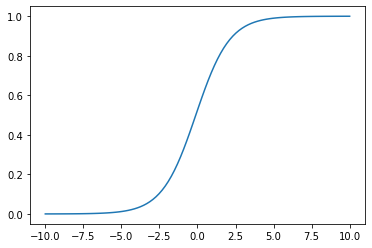

In [223]:
#We know that in the sigmoid function every element x,w,b are scalar. When we are passing a numpy array to function, it is doing python broad casting
# for each element of the array 
plt.plot(X,Y)
plt.show()

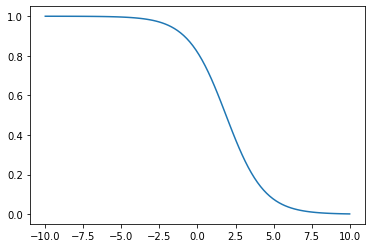

In [224]:
#I can flip the grph by changing the value of w from positve to negative
# if the change the value of b , the graph shifts
# we can change the value of w and b using sliders, in the code snippets , check for adding form fields
#google colab will interpret this as aslider
w = -0.8  #@param {type: "slider", min: -2, max: 2, step: 0.2}
b = 1.5 #@param {type: "slider", min: -2, max: 2, step: 0.2}
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

# By changing the value of w, we can see that w is controlling the graph.
# and b is controlling the posiiton

$S_{w_1,w_2,b}(x_1,x_2) =\frac{1}{1+e^{-(w_1x_1+w_2x_2+b)}}$
Sigmoid with 2 dimensional , 


In [225]:
def sigmoid_2D(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1 + w2*x2 +b)))

In [226]:
sigmoid_2D(1,0,0.5,0,0)

0.6224593312018546

In [227]:
#Lets google and see for 3 dimensional plot in matplotlib
X1= np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)
# for every combination of x1 and x2 , I need to calculate y. For that I am using meshgrid
XX1, XX2 = np.meshgrid(X1, X2)
print(X1.shape,X2.shape,XX1.shape,XX2.shape)


(100,) (100,) (100, 100) (100, 100)


In [228]:
w1 =0.5
w2 =0.5
b=0
Y=sigmoid_2D(XX1,XX2,w1,w2,b)

In [229]:
my_cmap =matplotlib.colors.LinearSegmentedColormap.from_list("",colors=["red","yellow","green"])

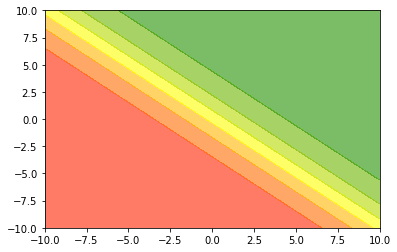

In [230]:
#Lets try a contour plot. that will display in a gradient form
plt.contourf(XX1,XX2,Y,cmap=my_cmap,alpha=0.6)
plt.show()

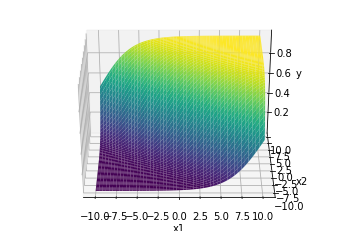

In [231]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(XX1, XX2, Y, 200, cmap='viridis', edgecolor='none')
ax.plot_surface(XX1, XX2, Y, cmap='viridis', edgecolor='none')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

#example, we'll use an elevation of 30 degrees (that is, 
#30 degrees above the x-y plane) and an azimuth of 270 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):
ax.view_init(30, 270)

# If you change the value of one of the weights, We can see that weight will do a major role 

#Compute loss for given dataset

For the given input and output identify the parameter of x and y. For that that we are using a grid search.
For that I need some randon numbers. random.random generate values between -1 and 1 , But i need values between -10 and 10 . so I multiply with the entire length (20) and subtracting 10

In [232]:
w_unknown = 0.5
b_unknown = 0.25
X=np.random.random(25)*20 - 10
Y = sigmoid(X,w_unknown,b_unknown)

<function matplotlib.pyplot.show>

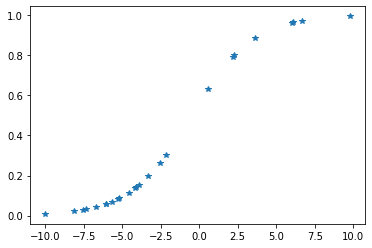

In [233]:
plt.plot(X,Y,'*')
plt.show

In [234]:
def calculate_loss(X,Y,w_est,b_est) :
  loss =0
  for x,y in zip(X,Y):
    loss +=(y-sigmoid(x,w_est,b_est))**2
    return loss

In [235]:
# from the values of X and Y identify the values of x and b. For that we are using mesh grid
# from the X Y plot we know that the negative value of w will twist the graph towards the opposite direction. So its better to take + values
#w = np.linspace(-1,1,100)
w = np.linspace(0,2,100)
b = np.linspace(-1,1,100)
WW,BB = np.meshgrid(w,b)
Loss = np.zeros(WW.shape)

In [236]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])

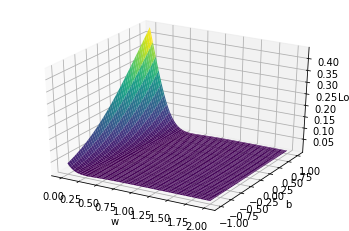

In [237]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');
#ax.view_init(30, 180)

In [238]:
#From this graph very difficult to identify the minimum values. so we will using grid serarch to identify the same
ij =np.argmin(Loss) # will list the index value after flattening the 3 dimensional array
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i*Loss.shape[1])
print (i,j,ij,i*Loss.shape[1])

69 26 6926 6900


In [239]:
print(WW[i,j],BB[i,j])

0.5252525252525253 0.39393939393939403


#Class for Sigmoid Neuron

In [295]:
class SigmoidNeuron:
  def __init__(self):
    self.w =None
    self.b =None
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  def grad_w(self,x,y): # as per the calculation we derived
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x
  def grad_b(self,x,y): # as per the calculation we derived
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)
  def fit(self,X,Y,epochs=1,learning_rate =1,initialize =True,display_loss = False):
    #initialize w and b
    if initialize :
      self.w = np.random.randn(1,X.shape[1])
      self.b =0
    if display_loss :
      loss = {}
    for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
      # This will show progress of the process using tqdm
    #for i in range(epochs):
      dw =0
      db =0
      for x,y in zip(X,Y):
        dw+=self.grad_w(x,y)
        # db+=self.grad_b(w,y)

        # above line commented by parveen

        db += self.grad_b(x, y)
      self.w -= learning_rate*dw
      self.b -= learning_rate*db

      if display_loss :
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred,Y)
    
    if display_loss :
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squred Error')
      plt.show()

  def predict(self, X):
    Y_pred =[]
    for x in X :
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

#Fit for toy data

In [241]:
X= np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y=[1,1,1,0,0,0]

In [242]:
sn =SigmoidNeuron()
X.shape

(6, 2)

In [243]:
sn.fit(X,Y,1,0.25,True)

In [244]:
print(sn.w,sn.b)

[[0.07391018 0.4832531 ]] [0.01142476]


In [245]:
# Lets implement subplot. In this we have define axis ax
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX1 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  print(YY.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,cmap = my_cmap,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap = my_cmap)
  ax.plot()


[[ 0.48378362 -0.83069286]] [0.05233019]
(100, 100)
[[ 0.88665474 -0.357279  ]] [0.10836888]
(100, 100)
[[ 1.06626563 -0.24606103]] [0.00225119]
(100, 100)
[[ 1.07919231 -0.55548757]] [-0.09980779]
(100, 100)
[[ 1.32848824 -0.18083747]] [-0.17338421]
(100, 100)
[[ 1.25926202 -0.70730639]] [-0.27090503]
(100, 100)
[[ 1.5340175  -0.25796541]] [-0.33512678]
(100, 100)
[[ 1.46641714 -0.70476567]] [-0.42097396]
(100, 100)
[[ 1.64397668 -0.41630501]] [-0.46844228]
(100, 100)
[[ 1.62638103 -0.60556331]] [-0.51527609]
(100, 100)
[[ 1.68910051 -0.53802118]] [-0.54199752]
(100, 100)
[[ 1.71139837 -0.56974286]] [-0.56853883]
(100, 100)
[[ 1.74133572 -0.57373806]] [-0.59185168]
(100, 100)
[[ 1.76759615 -0.58297761]] [-0.61381893]
(100, 100)
[[ 1.7927196  -0.59092286]] [-0.63433621]
(100, 100)
[[ 1.81652366 -0.59853561]] [-0.65360272]
(100, 100)
[[ 1.83916195 -0.60577383]] [-0.67174725]
(100, 100)
[[ 1.86074061 -0.61267515]] [-0.68888353]
(100, 100)
[[ 1.88135303 -0.61926928]] [-0.7051094]
(100, 10

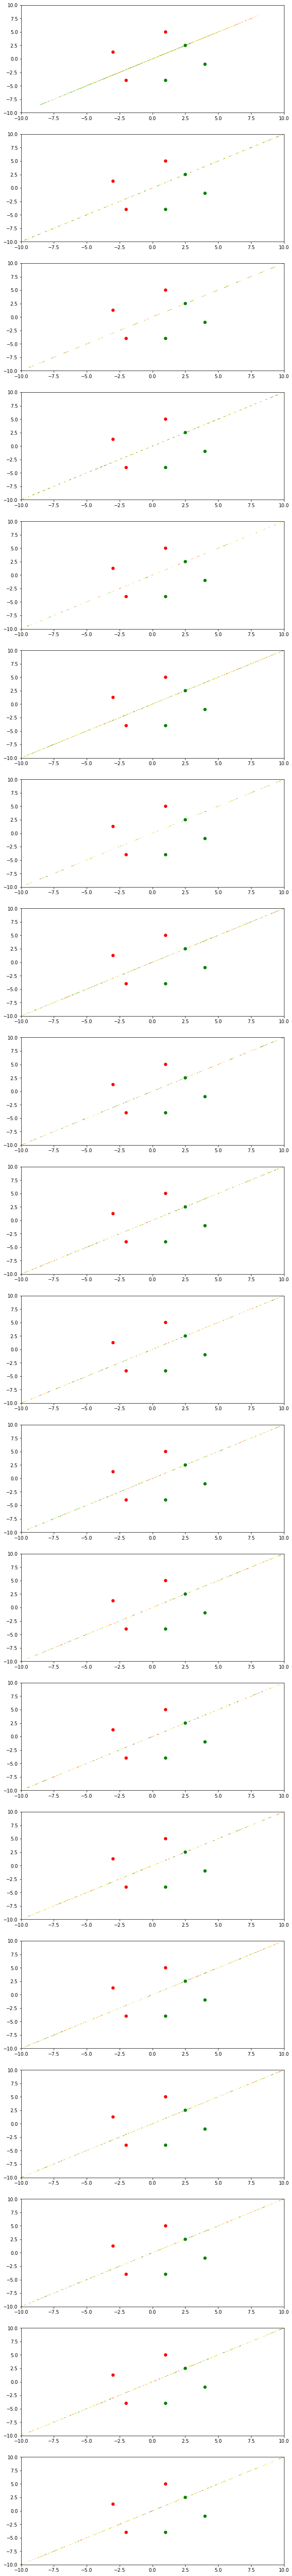

In [246]:
sn.fit(X,Y,1,0.75,True)
N =20
plt.figure(figsize=(10,N*5))
for i in range(N) :
  print(sn.w,sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,1,0.75,False)

#Real world Problem solving

In [247]:
!ls
# Load mobile data
data = pd.read_csv('sample_data/mobile_cleaned.csv')

sample_data


In [248]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [249]:
data.shape

(341, 88)

In [250]:
X=data.drop('Rating', axis=1)

In [251]:
Y=data['Rating'].values #convering to arrays

In [252]:
# Here we have to do binarisation on Y becuse we are working on sigmoid neurons. 
#SN can work on real inputs but the output is binarised . Y is having values between 3.5 and 4.5
# so we set a threshold 4, astype(np.int) will convert True to 1 and False to 0
threshold =4
data['Class'] = (data['Rating'] >=threshold).astype(np.int)


In [253]:
data['Class'].value_counts()

1    238
0    103
Name: Class, dtype: int64

In [254]:
data['Class'].value_counts(normalize=True)

1    0.697947
0    0.302053
Name: Class, dtype: float64

In [255]:
# Here its showing 70 % of the data is 1 . That means the data is little skewed. Lets try by incresing the threshold by 4.2
#so that the base line becomes 50 % in case of a binary classification kind of algorithm
threshold =4.2
data['Class'] = (data['Rating'] >=threshold).astype(np.int)

In [256]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [257]:
Y_binarized = data['Class'].values

#Standardization

In [258]:
# From sklearn use the standardization tecnique

In [259]:
R = np.random.random([100,1])

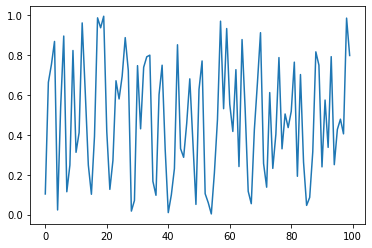

In [260]:
plt.plot(R)

In [261]:
np.mean(R)

0.47979835526751663

In [262]:
np.std(R)

0.29238255216933495

In [263]:
scaler = StandardScaler()
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [264]:
scaler.mean_

array([0.47979836])

In [265]:
RT = scaler.transform(R)
np.mean(RT)

-5.773159728050814e-17

In [266]:
np.std(RT)

1.0

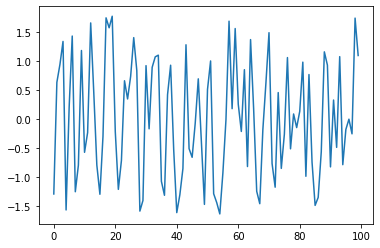

In [267]:
plt.plot(RT)
plt.show()

In [268]:
# Both the graph looks alsmost same. But the mean is near to 0 and standard deviation is near to 1


In [269]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state =0,stratify =Y_binarized)

In [270]:
print (X_train.shape,X_test.shape)

(255, 87) (86, 87)


In [271]:
scaler = StandardScaler()


In [272]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [273]:
# Here we standardized the X part. How we do Y part. We have to fit the values between 0 and 1 for that we are using minmaxscaler
minmax_scaler = MinMaxScaler()

In [274]:
#|Y_scaled_train = minmax_scaler.fit_transform(Y_train)


In [275]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1) )

In [276]:
np.max(Y_scaled_train)

1.0

In [277]:
np.min(Y_scaled_train)

0.0

In [278]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))

In [279]:
# Previously we applied the threshold 4.2. Now after applying scaling, lets find the threshold
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(-1,1)))[0][0]

In [280]:
scaled_threshold

0.6800000000000002

In [281]:
Y_binarized_train = (Y_scaled_train > scaled_threshold).astype(int).ravel()

In [282]:
Y_binarized_test = (Y_scaled_test > scaled_threshold).astype(int).ravel()

#Train on Real Data

In [296]:
sn = SigmoidNeuron()

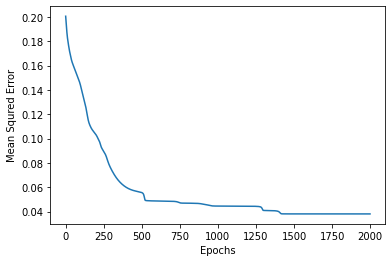

In [297]:
sn.fit(X_scaled_train,Y_scaled_train,epochs=2000,learning_rate=0.015,display_loss = True)

In [285]:
Y_pred_train = sn.predict(X_scaled_train)

In [286]:
Y_pred_test = sn.predict(X_scaled_test)

In [287]:
Y_pred_binarized_train = (Y_pred_train > scaled_threshold).astype(int).ravel()
Y_pred_binarized_test = (Y_pred_test > scaled_threshold).astype(int).ravel()

In [288]:
accuracy_train = accuracy_score(Y_pred_binarized_train,Y_binarized_train)
accuracy_test = accuracy_score(Y_pred_binarized_test,Y_binarized_test)

In [289]:
print (accuracy_train,accuracy_test)

0.803921568627451 0.813953488372093


In [290]:
# Currently the epoch  is 10 and learning reate =0.2 just change the calue to 1000 and 0.01, 
#I am getting an accuracy score of 0.75 and 0.74

# We are keep on changing epochs and learning rate to find out the accuracy. It's a better way to understand
# it using a plot. for  that we are introducing one more parameter display_loss in the class and re-run the same